<a href="https://colab.research.google.com/github/anya765/climate-evidence-synthesis-nlp/blob/main/viz_experiments.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
[0.94393845 1.09865047 1.09353705 1.03661328 1.03103079]
[1.90174079 1.94926604 1.96593569 1.91669512 1.92124462]
[3.08072857 3.04762563 2.94208991 3.03827949 3.02841906]


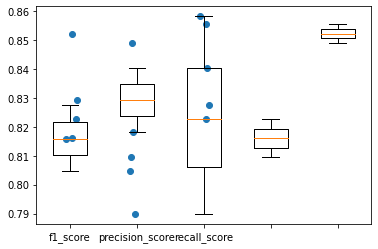

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import os
if os.path.exists("/content/"):
    from google.colab import drive
    import os
    drive.mount('/content/drive')
    os.chdir("/content/drive/MyDrive/climate-science") 

results = pd.read_json("cv_data/INCLUDE/outer_results_5_splits.json")

fig, ax = plt.subplots()

for i, metric in enumerate(results.columns):
    jitter = np.random.random(size=results.shape[0])*0.2 + i+0.9
    print(jitter)
    ax.scatter(jitter, results[metric], color="C0")
    
ax.boxplot(results, showfliers=False)
ax.set_xticklabels(results.columns)
plt.show()

In [ ]:
results

,f1_score,precision_score,recall_score
0,0.815972,0.804795,0.827465
1,0.829175,0.818182,0.840467
2,0.822642,0.789855,0.858268
3,0.816000,0.809524,0.822581
4,0.852273,0.849057,0.855513


[Text(0, 0, 'Micro average'),
 Text(0, 0, 'Macro average'),
 Text(0, 0, 'Coastal and marine Ecosystems'),
 Text(0, 0, 'Human and managed systems'),
 Text(0, 0, 'Mountains, snow and ice'),
 Text(0, 0, 'Rivers, lakes, and soil moisture'),
 Text(0, 0, 'Terrestrial ES')]

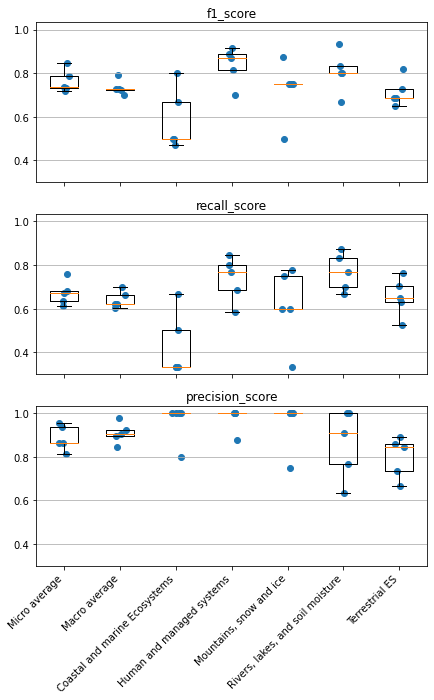

In [ ]:
results = pd.read_json("cv_data/12/outer_results_5_splits.json")
impact_labels = [
    "Coastal and marine Ecosystems",
    "Human and managed systems",
    "Mountains, snow and ice",
    "Rivers, lakes, and soil moisture",
    "Terrestrial ES"
]
impact_indices = [x for x in range(len(impact_labels))]

fig, axs = plt.subplots(3, figsize=(7,10), sharex=True, sharey=True)

metrics = ["f1_score", "recall_score", "precision_score"]
for i, metric in enumerate(metrics):
    ax = axs[i]
    ax.set_title(metric)
    metric_labels = [f"{metric}_{x}" for x in ["micro", "macro"] + impact_indices]
    for j, col in enumerate(metric_labels):
        jitter = np.random.random(size=results.shape[0])*0.2 + j+0.9
        ax.scatter(jitter, results[col], color="C0")    
        
    ax.boxplot([results[col] for col in metric_labels], showfliers=False)
    ax.grid(axis="y")
    
impact_labels = ["Micro average", "Macro average"] + impact_labels
ax.set_xticks(range(1,len(impact_labels)+1))
ax.set_xticklabels(impact_labels, rotation=45, ha="right")